In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

In [45]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
df.shape

(200, 5)

In [47]:
df=df.drop(columns=['CustomerID'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

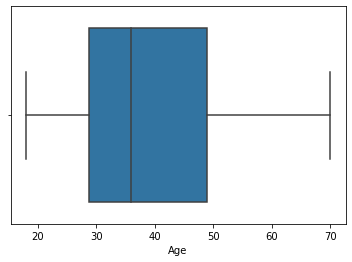

In [48]:
#univariate analysis

sns.boxplot(df['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

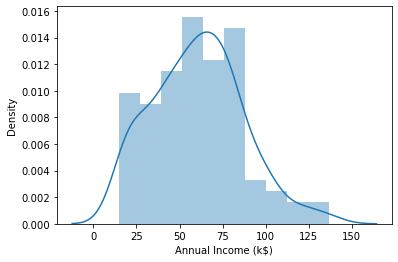

In [49]:
sns.distplot(df['Annual Income (k$)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

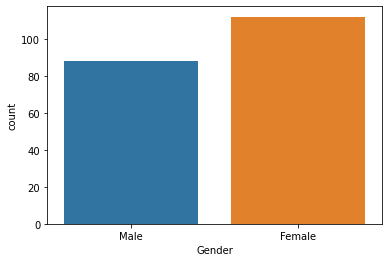

In [50]:
sns.countplot(df['Gender'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

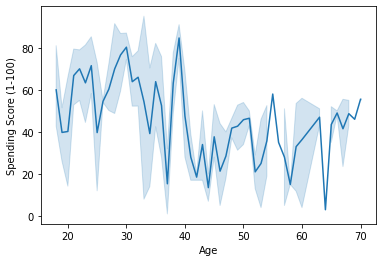

In [51]:
#bivariate analysis
sns.lineplot(df['Age'],df['Spending Score (1-100)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

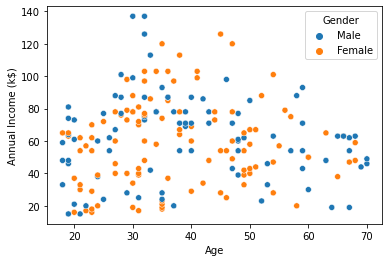

In [52]:
sns.scatterplot(df['Age'],df['Annual Income (k$)'],hue=df["Gender"])

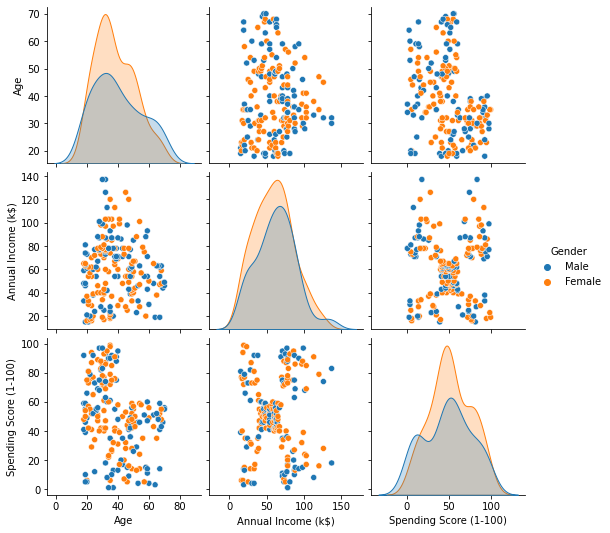

In [53]:
#Multivariate Analysis

sns.pairplot(df,hue='Gender')

<AxesSubplot:>

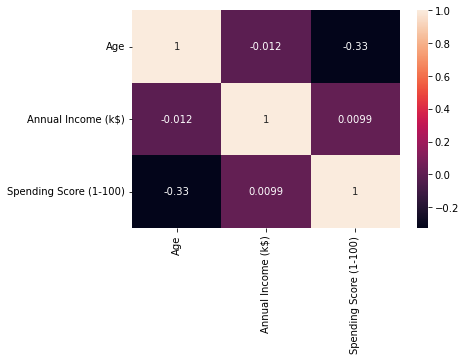

In [54]:
sns.heatmap(df.corr(),annot=True)

In [55]:
#descriptive analysis
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [56]:
#check missing values
df.isnull().sum() #no null values

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

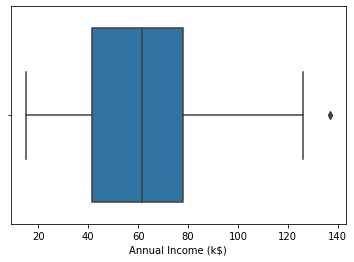

In [57]:
#finding outliers
sns.boxplot(df['Annual Income (k$)'])

In [58]:
#iqr median replacement
q1=df['Annual Income (k$)'].quantile(0.25)
q3=df['Annual Income (k$)'].quantile(0.75)
iqr=q3-q1
iqr

36.5

In [59]:
upperlimit=q3+1.5*iqr
lowerlimit=q1-1.5*iqr
print(upperlimit,lowerlimit)

132.75 -13.25


In [60]:
df["Annual Income (k$)"]=np.where(df["Annual Income (k$)"]>upperlimit,df['Annual Income (k$)'].median(),df["Annual Income (k$)"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

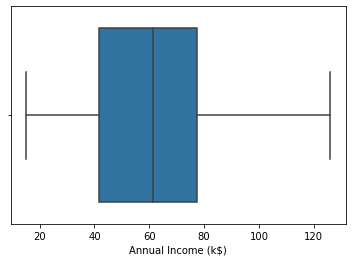

In [61]:
sns.boxplot(df['Annual Income (k$)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending Score (1-100)'>

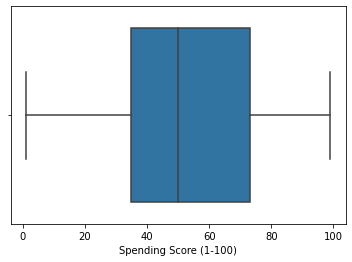

In [62]:
sns.boxplot(df['Spending Score (1-100)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

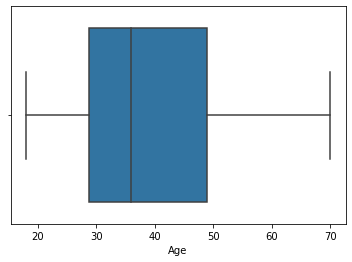

In [63]:
sns.boxplot(df['Age'])

In [64]:
df.shape

(200, 4)

In [65]:
#perform encoding for categorical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df.head() # male-1 female-0

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


In [66]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1=sc.fit_transform(df)
df1

array([[ 1.12815215, -1.42456879, -1.78877673, -0.43480148],
       [ 1.12815215, -1.28103541, -1.78877673,  1.19570407],
       [-0.88640526, -1.3528021 , -1.74885313, -1.71591298],
       [-0.88640526, -1.13750203, -1.74885313,  1.04041783],
       [-0.88640526, -0.56336851, -1.70892954, -0.39597992],
       [-0.88640526, -1.20926872, -1.70892954,  1.00159627],
       [-0.88640526, -0.27630176, -1.66900594, -1.71591298],
       [-0.88640526, -1.13750203, -1.66900594,  1.70038436],
       [ 1.12815215,  1.80493225, -1.62908235, -1.83237767],
       [-0.88640526, -0.6351352 , -1.62908235,  0.84631002],
       [ 1.12815215,  2.02023231, -1.62908235, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.62908235,  1.89449216],
       [-0.88640526,  1.37433211, -1.58915875, -1.36651894],
       [-0.88640526, -1.06573534, -1.58915875,  1.04041783],
       [ 1.12815215, -0.13276838, -1.58915875, -1.44416206],
       [ 1.12815215, -1.20926872, -1.58915875,  1.11806095],
       [-0.88640526, -0.

In [67]:
df1.shape

(200, 4)

In [68]:
#performing clutering

from sklearn.cluster import KMeans

error=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df1)
    error.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


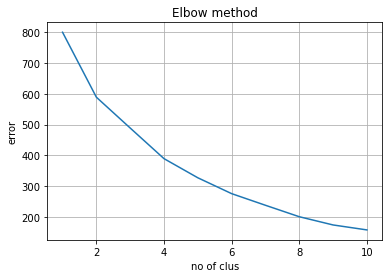

In [69]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.grid()
plt.show()

In [70]:
km=KMeans(n_clusters=8)
category=km.fit_predict(df1)
category

array([3, 3, 7, 7, 7, 7, 1, 7, 5, 7, 5, 7, 1, 7, 5, 3, 7, 3, 5, 7, 3, 3,
       1, 3, 1, 3, 1, 3, 1, 7, 5, 7, 5, 3, 1, 7, 1, 7, 1, 7, 1, 3, 5, 7,
       1, 7, 1, 7, 7, 7, 1, 3, 7, 5, 1, 5, 1, 5, 7, 5, 5, 3, 1, 1, 5, 3,
       1, 1, 3, 7, 5, 1, 1, 1, 5, 3, 1, 3, 7, 1, 5, 3, 5, 1, 7, 5, 1, 7,
       7, 1, 1, 3, 5, 1, 7, 3, 1, 7, 5, 3, 7, 1, 5, 3, 5, 7, 1, 5, 5, 5,
       5, 7, 1, 3, 7, 7, 1, 1, 1, 1, 3, 6, 4, 0, 6, 4, 2, 0, 2, 0, 2, 0,
       6, 4, 2, 4, 6, 0, 2, 4, 6, 0, 6, 4, 2, 0, 2, 4, 6, 0, 2, 0, 6, 4,
       6, 4, 2, 4, 2, 4, 6, 4, 2, 4, 2, 4, 2, 4, 6, 0, 2, 0, 2, 0, 6, 4,
       2, 0, 2, 0, 6, 4, 2, 4, 6, 0, 6, 0, 6, 4, 6, 4, 2, 4, 6, 4, 6, 0,
       2, 0])

In [71]:
#adding cluster data with primary dataset
df['category']=pd.Series(category)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),category
0,1,19,15.0,39,3
1,1,21,15.0,81,3
2,0,20,16.0,6,7
3,0,23,16.0,77,7
4,0,31,17.0,40,7


In [72]:
df.shape

(200, 5)

In [74]:
#splitting dependent and independent variable

y=df.iloc[:,-1]
y

0      3
1      3
2      7
3      7
4      7
      ..
195    4
196    6
197    0
198    2
199    0
Name: category, Length: 200, dtype: int32

In [75]:
X=df.iloc[:,:-1]
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40
...,...,...,...,...
195,0,35,120.0,79
196,0,45,126.0,28
197,1,32,126.0,74
198,1,32,61.5,18


In [77]:
#Split the data into training and testing.

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [78]:
print(X_train.shape)
print(X_test.shape)

(160, 4)
(40, 4)


In [79]:
#Builing model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()


In [80]:
#training model
model.fit(X_train,y_train)

RandomForestClassifier()

In [81]:
y_pred=model.predict(X_test)
y_pred

array([5, 2, 5, 5, 0, 2, 7, 2, 1, 6, 3, 4, 6, 6, 5, 7, 3, 2, 7, 5, 4, 0,
       7, 4, 5, 0, 0, 0, 1, 1, 1, 5, 2, 7, 1, 4, 0, 7, 1, 1])

In [82]:
#Evaluating model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [83]:
print('model accuracy', accuracy_score(y_test,y_pred))

model accuracy 0.95


In [84]:
train_pred=model.predict(X_train)
train_pred

array([2, 1, 1, 3, 6, 1, 5, 3, 1, 4, 1, 6, 6, 7, 0, 1, 5, 6, 1, 1, 0, 1,
       4, 7, 4, 5, 1, 4, 3, 1, 4, 1, 0, 1, 2, 1, 5, 5, 3, 0, 0, 1, 2, 4,
       5, 1, 7, 5, 6, 0, 7, 5, 6, 1, 6, 2, 4, 2, 1, 1, 2, 4, 1, 3, 7, 5,
       3, 5, 4, 3, 7, 7, 7, 5, 7, 4, 3, 6, 4, 3, 3, 7, 5, 7, 7, 1, 7, 1,
       2, 2, 1, 3, 7, 6, 4, 0, 2, 3, 0, 7, 1, 5, 7, 5, 3, 3, 3, 2, 5, 7,
       6, 0, 3, 1, 4, 5, 4, 2, 1, 1, 7, 0, 7, 2, 0, 2, 5, 6, 0, 4, 7, 3,
       5, 1, 7, 6, 4, 1, 3, 3, 4, 3, 6, 6, 6, 7, 7, 6, 7, 5, 7, 1, 3, 7,
       3, 1, 2, 1, 7, 2])

In [85]:
print('model train accuracy',accuracy_score(y_train,train_pred))

model train accuracy 1.0


<AxesSubplot:>

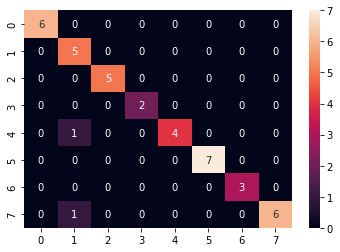

In [86]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         2
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         3
           7       1.00      0.86      0.92         7

    accuracy                           0.95        40
   macro avg       0.96      0.96      0.96        40
weighted avg       0.96      0.95      0.95        40

